In [14]:
# Example plot summary
plot_summary = """
In 1936, archaeologist Indiana Jones braves an ancient Peruvian temple filled with booby traps to retrieve a golden idol. 
Upon fleeing the temple, Indiana is confronted by rival archaeologist René Belloq and the indigenous Hovitos. Surrounded 
and outnumbered, Indiana is forced to surrender the idol to Belloq and escapes aboard a waiting Waco seaplane, in the 
process revealing his fear of snakes. Shortly after returning to the college in the United States where he teaches archaeology, 
Indiana is interviewed by two Army intelligence agents. They inform him that the Nazis, in their quest for occult power, 
are searching for his old mentor, Abner Ravenwood, who is the leading expert on the ancient Egyptian city of Tanis and possesses 
the headpiece of an artifact called the Staff of Ra. Indiana deduces that the Nazis are searching for Tanis because it is believed 
to be the location of the Ark of the Covenant, the biblical chest built by the Israelites to contain the fragments of the Ten Commandments; 
the Nazis believe that if they acquire it, their armies will become invincible. The Staff of Ra, meanwhile, is the key to finding the 
Well of Souls, a secret chamber in which the Ark is buried. The agents subsequently authorize Indiana to recover the Ark before the Nazis. 
Indiana travels to Nepal, only to find that Ravenwood has died and that the headpiece is in the possession of his daughter, Marion, Indiana's 
embittered former lover. Indiana offers to buy the headpiece for three thousand dollars, plus two thousand more when they return to the United 
States. Marion's tavern is suddenly raided by a group of thugs commanded by Nazi agent Toht. The tavern is burned down in the ensuing fight, 
during which Toht burns his hand on the searing hot headpiece as he tries to grab it. Indiana and Marion escape with the headpiece, with Marion 
declaring she will accompany Indiana in his search for the Ark so he can repay his debt. They travel to Cairo where they learn from Indiana's 
friend Sallah, a skilled excavator, that Belloq and the Nazis, led by Colonel Dietrich, are currently digging for the Well of Souls with a replica 
of the headpiece modeled after the scar on Toht's hand. In a bazaar, Nazi operatives attempt to kidnap Marion and as Indiana chases after them it 
appears that she dies in an explosion.
"""

In [1]:
from transformers import pipeline

# Load a summarization model (T5 or BART are commonly used for such tasks)
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")






/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <FD9BEDA3-7FDE-3298-84BC-7D1F1F8E037D> /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <A84DFEFF-287E-3B94-A7DB-731FA5F9CBBC> /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Summary:
In 1936, archaeologist Indiana Jones braves an ancient Peruvian temple filled with booby traps to retrieve a golden idol. Indiana is forced to surrender the idol to rival archaeologist René Belloq and escapes aboard a waiting Waco seaplane. Shortly after returning to the U.S., Indiana is interviewed by two Army intelligence agents. They tell him that the Nazis, in their quest for occult power, are searching for his old mentor, Abner Ravenwood, who


In [5]:
# Generate a summary
summary = summarizer(plot_summary, max_length=100, min_length=10)[0]["summary_text"]#, do_sample=False)

print("Summary:")
print(summary)

Summary:
In 1936, archaeologist Indiana Jones braves an ancient Peruvian temple filled with booby traps to retrieve a golden idol. Indiana is forced to surrender the idol to rival archaeologist René Belloq and escapes aboard a waiting Waco seaplane. Shortly after returning to the U.S., Indiana is interviewed by two Army intelligence agents. They tell him that the Nazis, in their quest for occult power, are searching for his old mentor, Abner Ravenwood, who


In [8]:
# Function to split text into smaller chunks
def split_text(text, max_length=512):
    sentences = text.split('. ')
    chunks = []
    current_chunk = ""
    for sentence in sentences:
        if len(current_chunk) + len(sentence) <= max_length:
            current_chunk += sentence + ". "
        else:
            chunks.append(current_chunk.strip())
            current_chunk = sentence + ". "
    if current_chunk:
        chunks.append(current_chunk.strip())
    return chunks

# Summarize each chunk with a dynamic max_length
def summarize_long_text(text, chunk_length=512, summary_length_ratio=0.5):
    chunks = split_text(text, max_length=chunk_length)
    chunk_summaries = []
    for chunk in chunks:
        # Dynamically set max_length based on input length and desired summary ratio
        max_summary_length = max(10, int(len(chunk.split()) * summary_length_ratio))
        summary = summarizer(chunk, max_length=max_summary_length, min_length=10, do_sample=False)[0]["summary_text"]
        chunk_summaries.append(summary)
    
    # Summarize the summarized chunks into one final summary
    combined_summary = " ".join(chunk_summaries)
    final_max_length = max(10, int(len(combined_summary.split()) * summary_length_ratio))
    final_summary = summarizer(combined_summary, max_length=final_max_length, min_length=10, do_sample=False)[0]["summary_text"]
    
    return final_summary



# Generate the final summary with a shorter max length
summary = summarize_long_text(plot_summary, chunk_length=512, summary_length_ratio=0.5)

print("Final Summary:")
print(summary)


Final Summary:
In 1936, archaeologist Indiana Jones braves an ancient Peruvian temple filled with booby traps to retrieve a golden idol. Indiana travels to Nepal, only to find that Ravenwood has died and that the headpiece is in the possession of his daughter, Marion.


In [13]:
f"total time to compute all plot summaries: {(42306 * 23) // 3600} hours"

'total time to compute all plot summaries: 270 hours'

## sentiment analysis

In [15]:
!pip install textblob

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 2.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [31]:
from textblob import TextBlob

# Example processed summary
summary = "Indiana Jones confronts the Nazis and faces danger while searching for the Ark."
#summary = "happinness, sun, birds"
# Function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment

# Get sentiment
sentiment = analyze_sentiment(summary)
print("Sentiment Polarity:", sentiment.polarity)  # Range: -1 (negative) to 1 (positive)
print("Sentiment Subjectivity:", sentiment.subjectivity)  # Range: 0 (objective) to 1 (subjective)


Sentiment Polarity: 0.0
Sentiment Subjectivity: 0.0


In [33]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [34]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Example processed summary
summary = "Indiana Jones confronts the Nazis and faces danger while searching for the Ark."

# Get sentiment scores
scores = sid.polarity_scores(summary)

print("Sentiment Scores:", scores)
print("Overall Sentiment Polarity:", scores['compound'])  # Range: -1 (negative) to 1 (positive)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/anoushazarpey/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [35]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentiment Analysis Result: [{'label': 'NEGATIVE', 'score': 0.8860408067703247}]


In [36]:

# Example processed summary
summary = "sun, flowers, fresh air, strawberries"

# Get sentiment
sentiment = sentiment_analyzer(summary)

print("Sentiment Analysis Result:", sentiment)

Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9998576641082764}]


In [38]:

# Example processed summary
summary = "donald trump, elon musk"

# Get sentiment
sentiment = sentiment_analyzer(summary)

print("Sentiment Analysis Result:", sentiment)

Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9974061846733093}]


In [41]:

# Example processed summary
summary = "macron"

# Get sentiment
sentiment = sentiment_analyzer(summary)

print("Sentiment Analysis Result:", sentiment)

Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9932821989059448}]


## thematic analysis

In [27]:
#!python -m spacy download en
!python3 -m spacy download en_core_web_sm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.6 MB/s eta 0:00:0000:0100:01
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic-core 2.20.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
selenium 4.18.1 requires typing_extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.2.2 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
torchaudio 2.2.1 requires torch==2.2.1, but you have torch

In [28]:
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Example Stanford CoreNLP-processed summary
processed_summary = "Indiana Jones, a famous archaeologist, faces the Nazis while searching for the Ark of the Covenant."

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Get entities
entities = extract_entities(processed_summary)
print("Named Entities:", entities)

# Count frequency of entities for thematic analysis
entity_freq = Counter([ent[0] for ent in entities])
print("Entity Frequency:", entity_freq)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


Named Entities: [('Indiana Jones', 'PERSON'), ('Nazis', 'NORP'), ('the Ark of the Covenant', 'PERSON')]
Entity Frequency: Counter({'Indiana Jones': 1, 'Nazis': 1, 'the Ark of the Covenant': 1})


## trend exploration

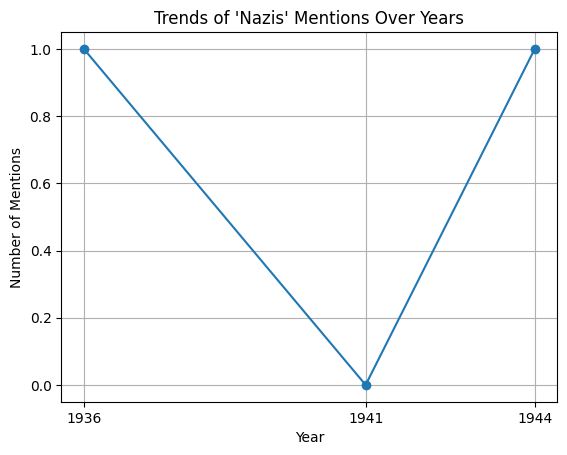

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame containing summaries and years
data = {
    'year': [1936, 1936, 1941, 1944],
    'summary': [
        "Indiana Jones retrieves the Ark of the Covenant from the Nazis.",
        "The search for the Holy Grail leads Indiana into conflict.",
        "Indiana faces supernatural forces in his adventures.",
        "The Nazis try to harness the power of the Ark."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to count mentions of 'Nazis'
def count_mentions(df, keyword):
    return df['summary'].str.count(keyword).sum()

# Count occurrences of 'Nazis' by year
df['nazi_mentions'] = df['summary'].apply(lambda x: count_mentions(pd.DataFrame({'summary': [x]}), 'Nazis'))
nazi_trends = df.groupby('year')['nazi_mentions'].sum().reset_index()

# Plotting
plt.plot(nazi_trends['year'], nazi_trends['nazi_mentions'], marker='o')
plt.title("Trends of 'Nazis' Mentions Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Mentions")
plt.xticks(nazi_trends['year'])
plt.grid()
plt.show()


# LF's tests

In [75]:
from rake_nltk import Rake
import pandas as pd
import string

# Initialize the keyword extractor
r = Rake()

su_df = pd.read_csv("./MovieSummaries/processed_plot_summaries.csv")

# Define a function to extract keywords from a summary
def extract_keywords(summary):
    r.extract_keywords_from_text(summary)
    keywords = r.get_ranked_phrases_with_scores()
    words = [word.strip(string.punctuation) for score, keyword in keywords for word in keyword.split()] #words = [word for score, keyword in keywords for word in keyword.split()]
    return " ".join(words[:3])

# Apply the function to the "summary" column of the DataFrame
su_df["keywords"] = su_df["Summary"].apply(extract_keywords)
su_df.to_csv("./MovieSummaries/processed_plot_summaries.csv", index=False)

su_df

,Wikipedia movie ID,Summary,Movie release date,keywords
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",1990,working taxi driver
1,31186339,The nation of Panem consists of a wealthy Capi...,2012,rule change allowing
2,20663735,Poovalli Induchoodan is sentenced for six yea...,2000,manapally sudheeran
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",1951,next visits local
4,595909,Seventh-day Adventist Church pastor Michael Ch...,1988,day adventist church
...,...,...,...,...
39581,34808485,"The story is about Reema , a young Muslim scho...",2012,young muslim schoolgirl
39582,1096473,"In 1928 Hollywood, director Leo Andreyev look...",1928,grand duke sergius
39583,35102018,American Luthier focuses on Randy Parsons’ tra...,2011,clients like jack
39584,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",1961,small bengali girl


In [58]:
# Print the number of words in the cell in the "keywords" column and the 3rd row
print(len(su_df.loc[2, "keywords"].split()))
#chelou car parfois pas 3 mots mais moins


2


       Wikipedia movie ID                                            Summary  \
0                23890098  Shlykov, a hard-working taxi driver and Lyosha...   
0                23890098  Shlykov, a hard-working taxi driver and Lyosha...   
0                23890098  Shlykov, a hard-working taxi driver and Lyosha...   
1                31186339  The nation of Panem consists of a wealthy Capi...   
1                31186339  The nation of Panem consists of a wealthy Capi...   
...                   ...                                                ...   
39584             8628195  Abdur Rehman Khan , a middle-aged dry fruit se...   
39584             8628195  Abdur Rehman Khan , a middle-aged dry fruit se...   
39585             6040782  1940 - Operation Dynamo has just taken place. ...   
39585             6040782  1940 - Operation Dynamo has just taken place. ...   
39585             6040782  1940 - Operation Dynamo has just taken place. ...   

       Movie release date              

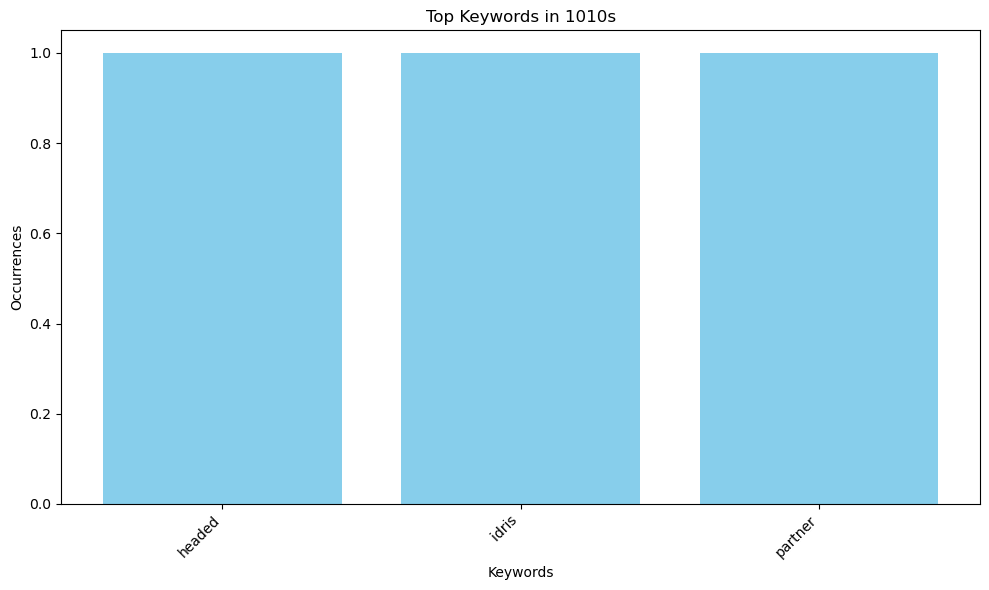

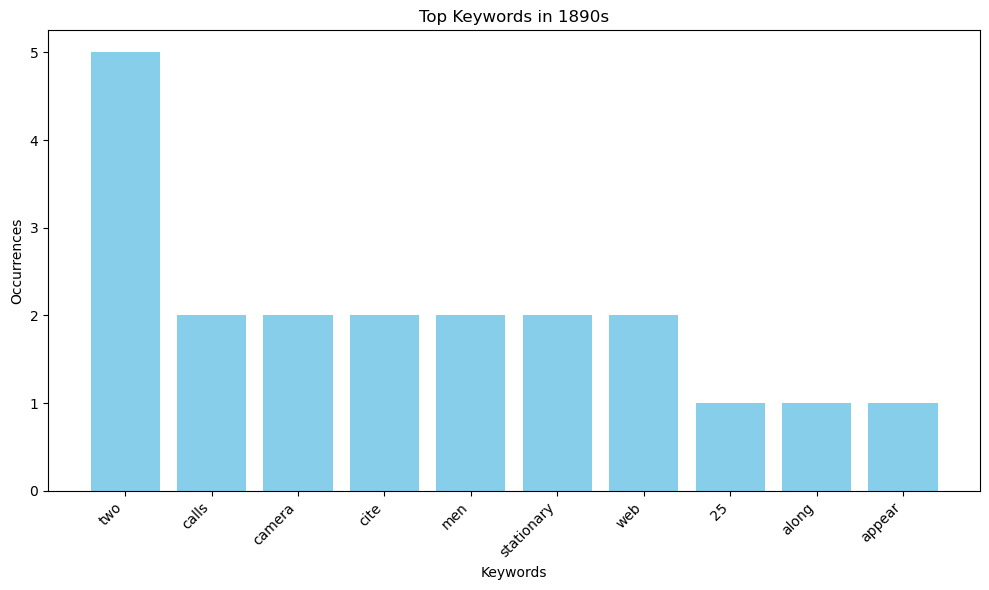

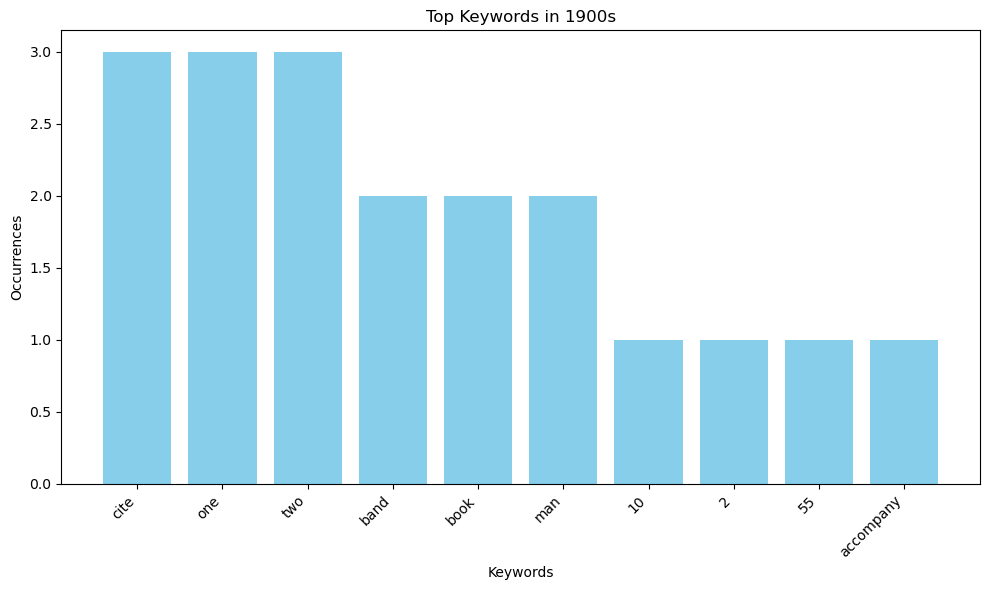

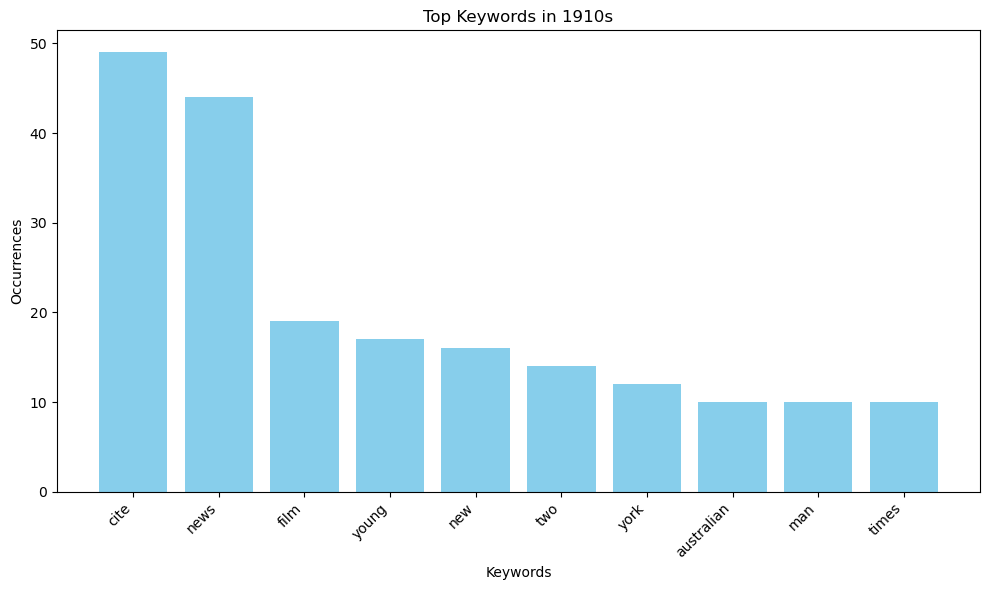

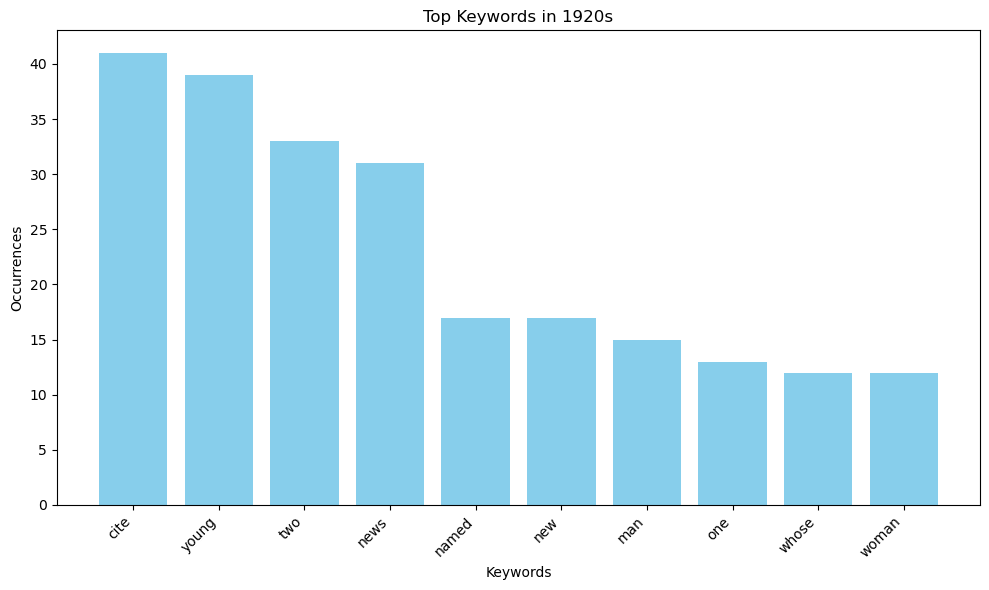

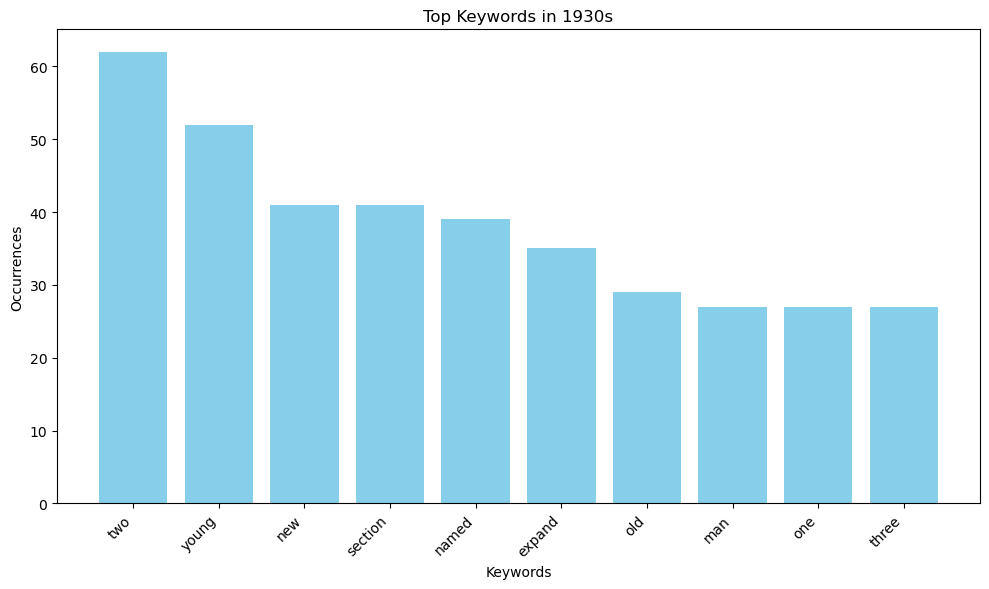

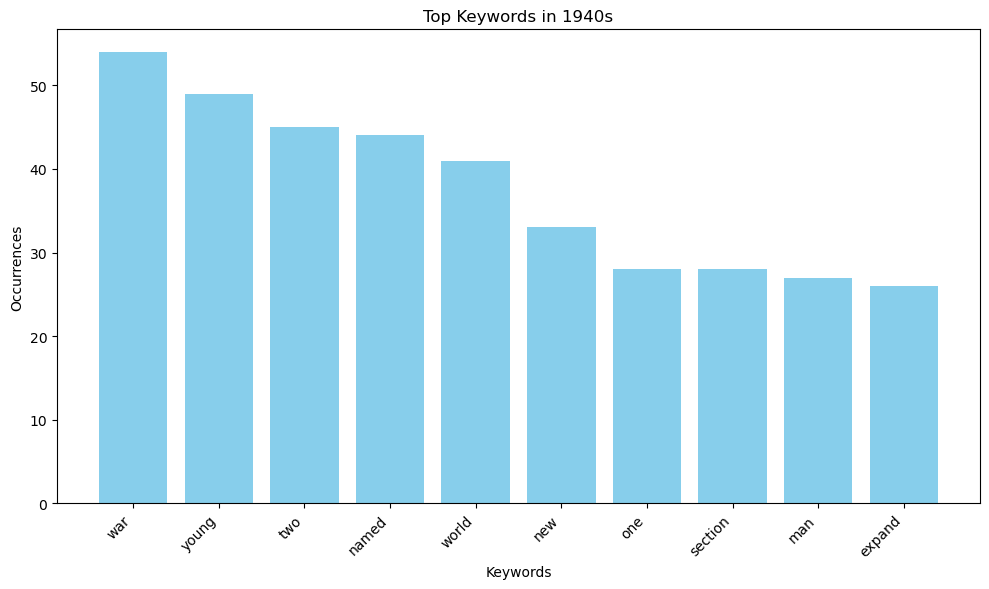

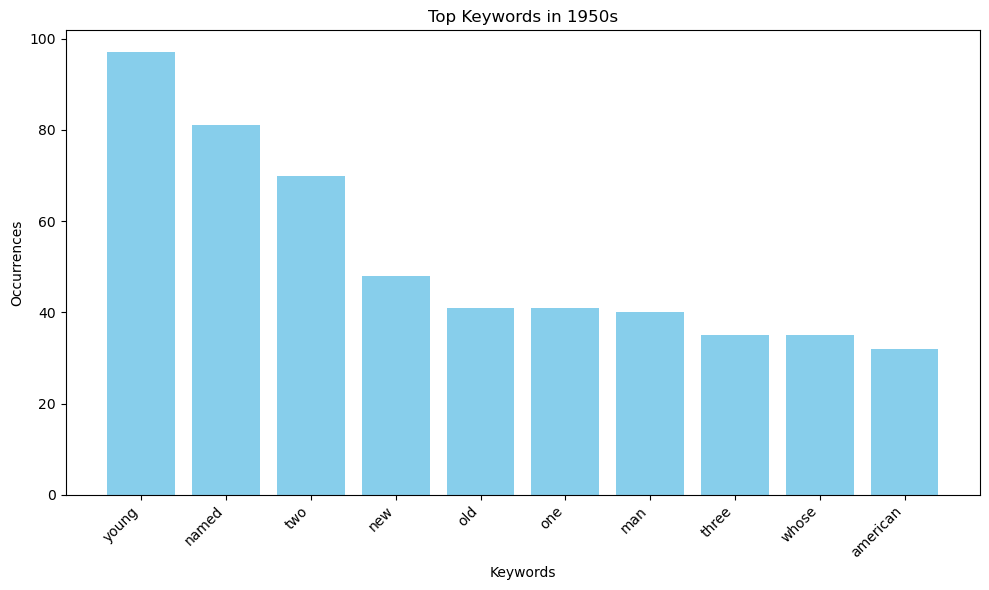

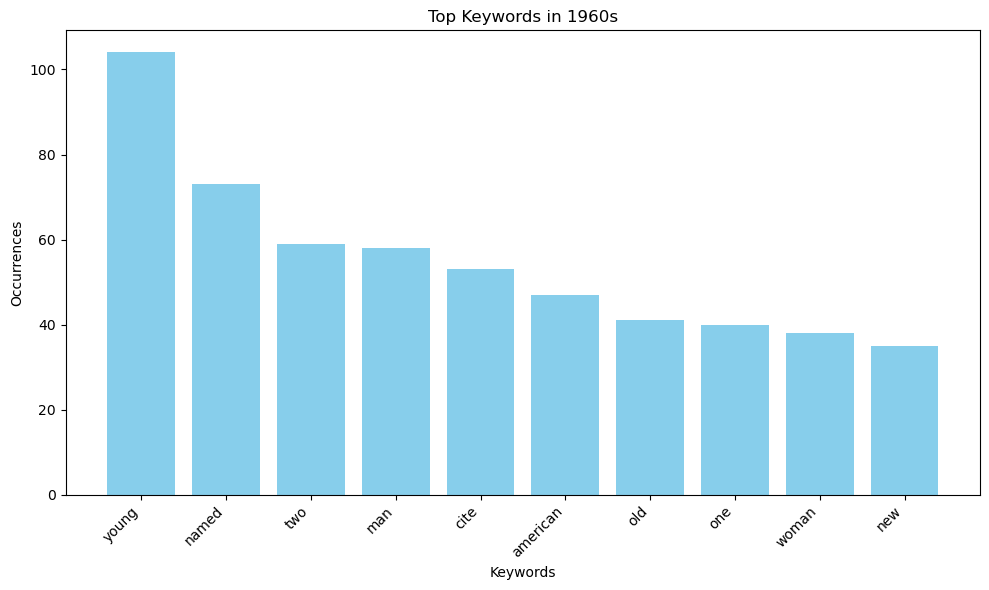

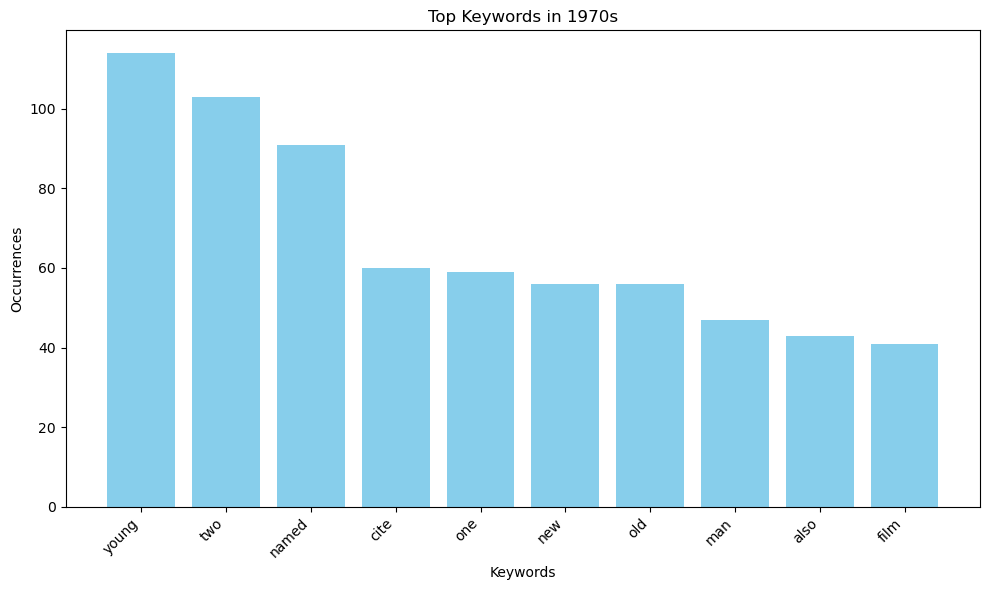

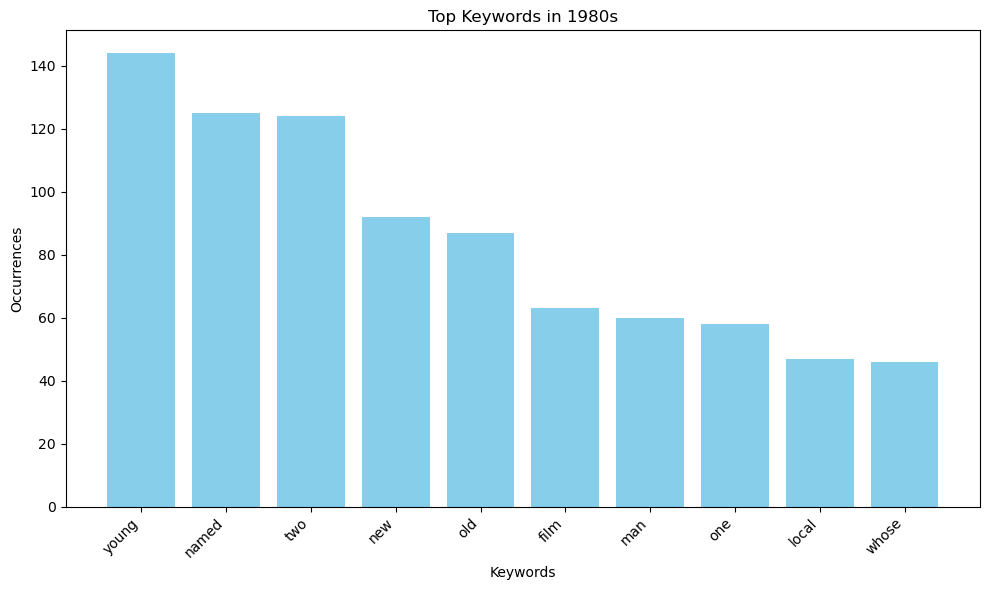

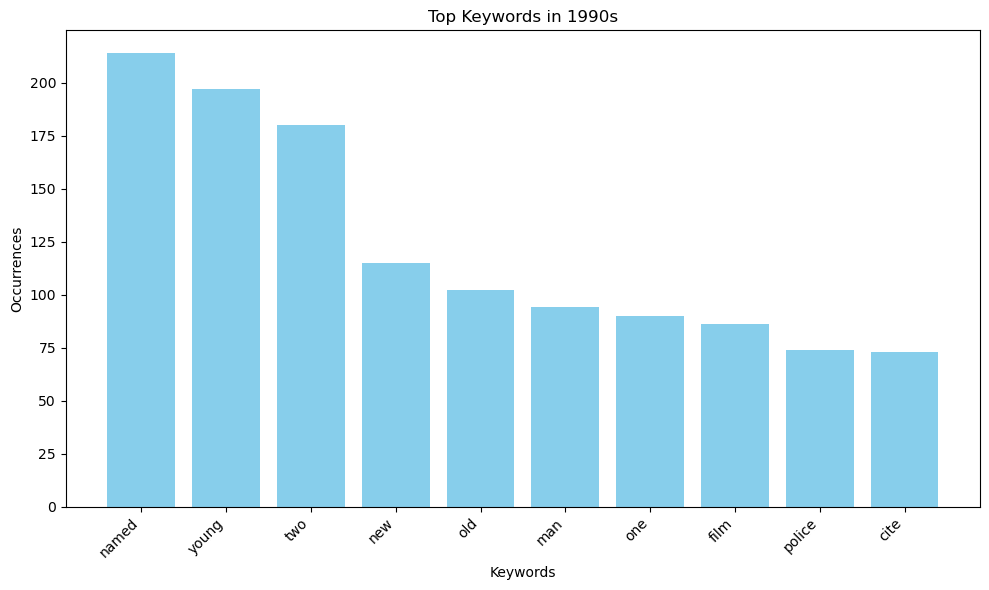

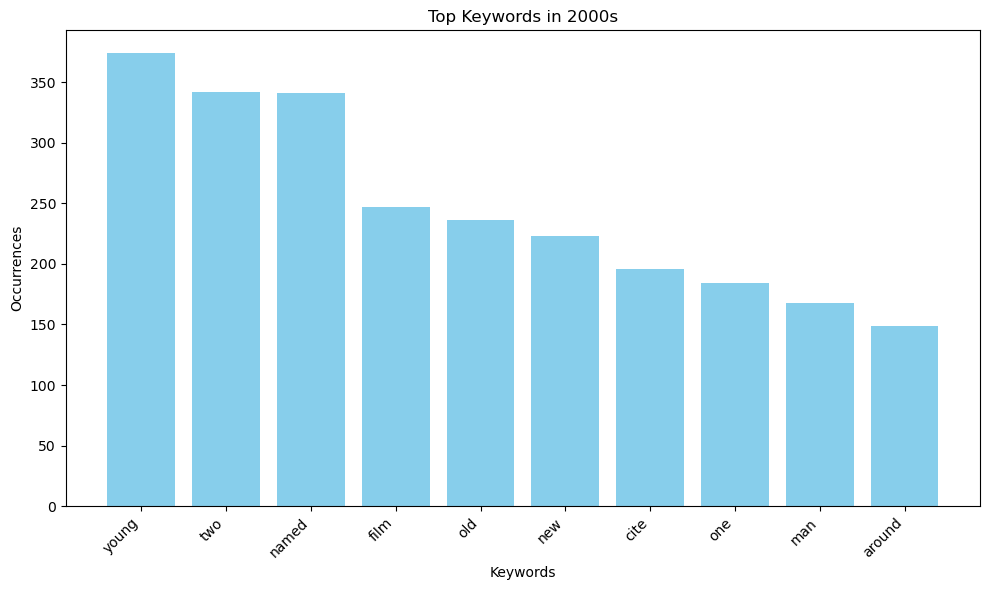

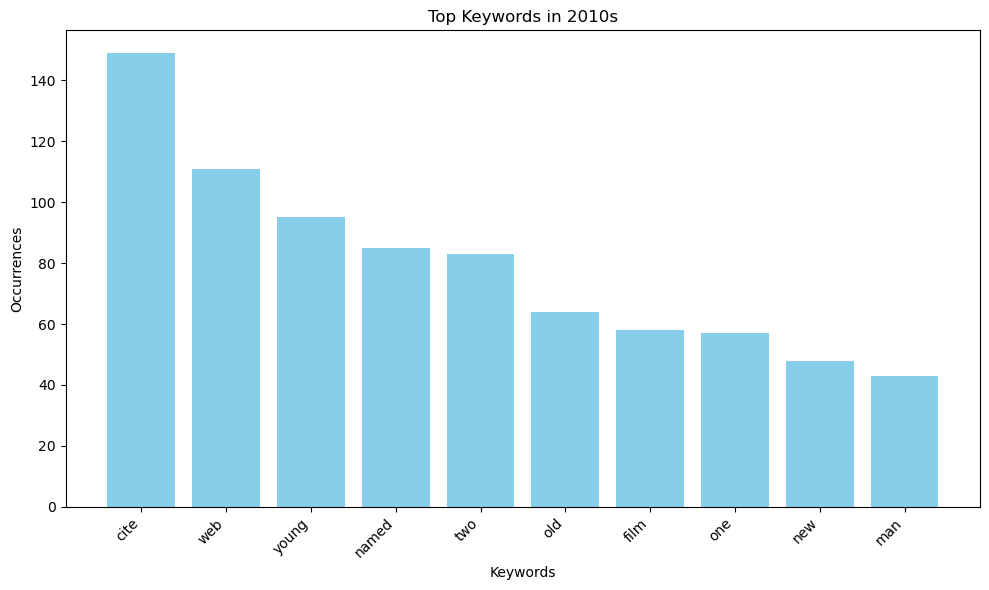

In [77]:
# Split keywords into individual words and explode into rows for counting
keyword_df = su_df.assign(keyword=su_df["keywords"].str.split()).explode("keyword")

print(keyword_df)

# Group by year and keyword to count occurrences
keyword_counts = keyword_df.groupby(["Movie release date", "keyword"]).size().reset_index(name="count")

print(keyword_counts)

# Calculate the decade for each release year
keyword_counts["Decade"] = (keyword_counts["Movie release date"] // 10) * 10

# Get the list of unique decades
decades = sorted(keyword_counts["Decade"].unique())

# Plot keyword occurrences for each decade
for decade in decades:
    # Filter data for the current decade
    decade_data = keyword_counts[keyword_counts["Decade"] == decade]
    
    # Aggregate by keyword within the decade
    decade_keyword_counts = decade_data.groupby("keyword")["count"].sum().reset_index()
    
    # Sort keywords by count to get the most frequent ones
    top_keywords = decade_keyword_counts.nlargest(10, "count")
    
    # Plot for the current decade
    plt.figure(figsize=(10, 6))
    plt.bar(top_keywords["keyword"], top_keywords["count"], color="skyblue")
    plt.title(f"Top Keywords in {decade}s")
    plt.xlabel("Keywords")
    plt.ylabel("Occurrences")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [52]:
#Long

import yake

su_df_yake = pd.read_csv("./MovieSummaries/processed_plot_summaries.csv")

# Define a function to extract keywords from a summary
def extract_keywords_yake(summary):
    kw_extractor = yake.KeywordExtractor()
    keywords = kw_extractor.extract_keywords(summary)
    words = [word for keyword, score in keywords for word in keyword.split()]
    return " ".join(words[:3]
    )

# Apply the function to the "summary" column of the DataFrame
su_df_yake["keywords"] = su_df_yake["Summary"].apply(extract_keywords_yake)

su_df_yake

KeyboardInterrupt: 